Epoch 1/100
12/12 [==============================] - 8s 567ms/step - loss: 0.8743 - accuracy: 0.5443 - val_loss: 0.6802 - val_accuracy: 0.5104
Epoch 2/100
12/12 [==============================] - 7s 629ms/step - loss: 0.6964 - accuracy: 0.5964 - val_loss: 0.4780 - val_accuracy: 1.0000
Epoch 3/100
12/12 [==============================] - 7s 615ms/step - loss: 0.3046 - accuracy: 0.9401 - val_loss: 1.0252 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 6s 504ms/step - loss: 0.1276 - accuracy: 0.9583 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 5/100
12/12 [==============================] - 9s 747ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 8.0585e-04 - val_accuracy: 1.0000
Epoch 7/100
12/12 [==============================] - 9s 770ms/step - loss: 5.8621e-04 - accuracy: 1.0000 - val_loss: 3.4468e-04 - val_accu

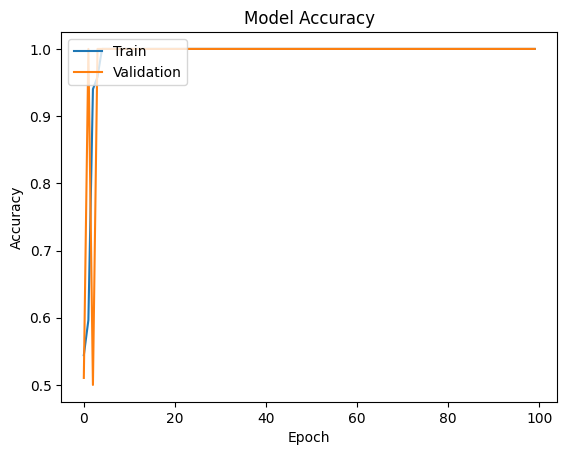

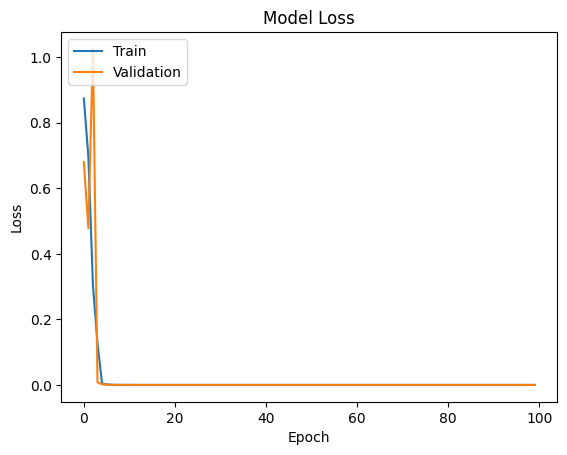

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

# Load data from positive and negative directories
def load_data_from_directories(pos_directory, neg_directory, img_size=(100, 100)):
    positive_images = []
    negative_images = []

    # Load positive images
    for filename in os.listdir(pos_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(pos_directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize image
            positive_images.append(img)

    # Load negative images
    for filename in os.listdir(neg_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(neg_directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize image
            negative_images.append(img)

    return np.array(positive_images), np.array(negative_images)

# Directories containing positive and negative images
positive_directory = '/content/drive/MyDrive/POOL DATASET/POOL DATASET (SEGREGATED)/positive'
negative_directory = '/content/drive/MyDrive/POOL DATASET/POOL DATASET (SEGREGATED)/NEGATIVE'

# Load data
positive_images, negative_images = load_data_from_directories(positive_directory, negative_directory)

# Create labels
positive_labels = np.ones((len(positive_images), 1))  # For multilabel, change this to appropriate shape
negative_labels = np.zeros((len(negative_images), 1))  # For multilabel, change this to appropriate shape

# Combine images and labels
X = np.concatenate((positive_images, negative_images), axis=0)
y = np.concatenate((positive_labels, negative_labels), axis=0)

# Normalize pixel values
X = X / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model for multilabel classification
def create_multilabel_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='sigmoid'))  # Use sigmoid activation for multilabel classification
    return model

# Create multilabel CNN model
input_shape = X_train[0].shape
num_classes = 1  # Change this to the number of classes for multilabel classification
model = create_multilabel_cnn_model(input_shape, num_classes)

# Compile the model with appropriate loss and metrics for multilabel classification
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<ipython-input-2-9bf80eb4ed23>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


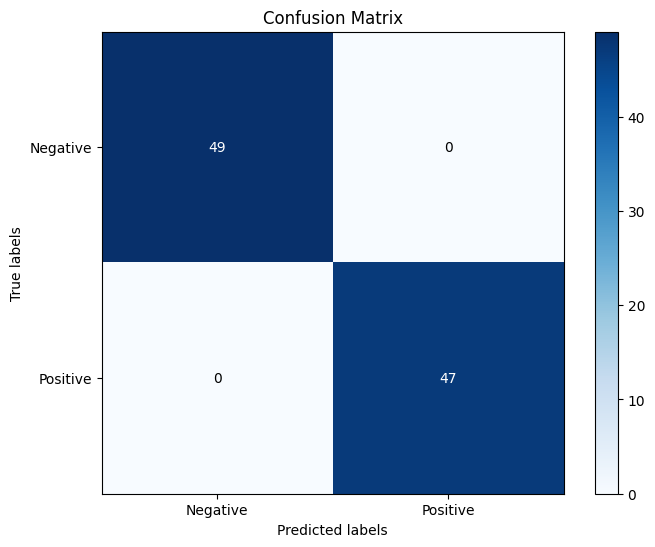

Confusion Matrix:
 [[49  0]
 [ 0 47]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred are defined
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with a custom colormap
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('Blues')
plt.imshow(confusion_mat, cmap=cmap)
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.title('Confusion Matrix')

# Display values on the confusion matrix with color coding
thresh = confusion_mat.max() / 2.0  # threshold to change text color
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if confusion_mat[i, j] > thresh else 'black')

plt.show()

# Print confusion matrix
print("Confusion Matrix:\n", confusion_mat)


In [ ]:
model_save_path = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_model'

# Save the entire model
model.save(model_save_path)

In [ ]:
import pandas as pd

# Save flattened and labeled image data
flattened_images = X.reshape(X.shape[0], -1)  # Flatten each image into a single row
data_with_labels = np.hstack((flattened_images, y))  # Append labels as the last column

# Convert to DataFrame
columns = [f'pixel_{i}' for i in range(flattened_images.shape[1])] + ['label']
df_images = pd.DataFrame(data_with_labels, columns=columns)

# Save images data to CSV
csv_file_path_images = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_images_with_labels.csv'
df_images.to_csv(csv_file_path_images, index=False)

# Save model evaluation results to CSV
df_eval = pd.DataFrame({
    'Metric': ['Test Loss', 'Test Accuracy'],
    'Value': [test_loss, test_accuracy]
})
csv_file_path_eval = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_model_evaluation.csv'
df_eval.to_csv(csv_file_path_eval, index=False)

# Save confusion matrix to CSV
df_confusion = pd.DataFrame(confusion_mat, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
csv_file_path_confusion = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_confusion_matrix.csv'
df_confusion.to_csv(csv_file_path_confusion)

# Generate classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
csv_file_path_class_report = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_performance_metrics.csv'
df_class_report.to_csv(csv_file_path_class_report, index=True)

# Save training history to CSV
df_history = pd.DataFrame(history.history)
csv_file_path_history = '/content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_training_history.csv'
df_history.to_csv(csv_file_path_history, index=False)

print(f"CSV files saved at: {csv_file_path_images}, {csv_file_path_eval}, {csv_file_path_confusion}, {csv_file_path_class_report}, {csv_file_path_history}")


CSV files saved at: /content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_images_with_labels.csv, /content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_model_evaluation.csv, /content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_confusion_matrix.csv, /content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_performance_metrics.csv, /content/drive/MyDrive/POOL DATASET/CNN_RMSPROP_training_history.csv
